## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import weightedstats as ws
import matplotlib.pyplot as plt

## 1.0 Leitura de Dados

In [2]:
df = pd.read_csv('dados/state.csv')
df.columns = ['Estado', 'População', 'Taxa de Homicídio', 'UF']

## 1.1 Dimensões

In [3]:
print("A base de dados possui %d linhas e %d colunas" % (df.shape))

A base de dados possui 50 linhas e 4 colunas


## 1.2 Tipo de Dados

In [4]:
print("O tipo de dados em cada coluna da base estão listados a seguir:")
df.dtypes

O tipo de dados em cada coluna da base estão listados a seguir:


Estado                object
População              int64
Taxa de Homicídio    float64
UF                    object
dtype: object

## 2.0 Medidas de tendência central

Essa seção contém exemplos de 6 medidas de tendência central.

(1) Média
(2) Média truncada
(2) Média ponderada
(3) Mediana
(4) Mediana ponderada
(5) Moda

In [5]:
coluna = "População"

print("Coluna:", coluna)
print("-- -- --")
print("Média: %.2f" % np.mean(df[coluna]))
print("Média aparada: %.2f" % stats.trim_mean(df[coluna], proportiontocut=0.1))
print("Mediana: %.2f" % np.median(df[coluna]))

Coluna: População
-- -- --
Média: 6162876.30
Média aparada: 4783697.12
Mediana: 4436369.50


In [6]:
coluna = "Taxa de Homicídio"

print("Coluna:", coluna)
print("-- -- --")
print("Média: %.2f" % np.mean(df[coluna]))
print("Média aparada: %.2f" % stats.trim_mean(df[coluna], proportiontocut=0.1))
print("Mediana: %.2f" % np.median(df[coluna]))
print("-- -- --")
print("-- Ponderada pela coluna População")
print("-- -- --")
print("Média Ponderada: %.2f" % np.average(df[coluna], weights = df['População']))
print("Mediana Ponderada: %.2f" % ws.weighted_median(df[coluna], weights = df['População']))
print("-- -- --")

Coluna: Taxa de Homicídio
-- -- --
Média: 4.07
Média aparada: 3.95
Mediana: 4.00
-- -- --
-- Ponderada pela coluna População
-- -- --
Média Ponderada: 4.45
Mediana Ponderada: 4.40
-- -- --


In [7]:
df['TH_Arrend'] = round(df['Taxa de Homicídio'], 0)
print("Moda:", stats.mode((df['TH_Arrend']))[0][0])
print("Contagem:", stats.mode((df['TH_Arrend']))[1][0])

Moda: 2.0
Contagem: 13


## 3.0 Visualização de distruição de dados

Distribuição e dados da coluna: População


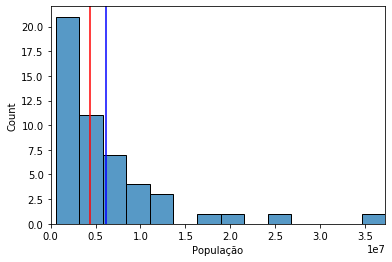

In [8]:
coluna = "População"

ax = sns.histplot(df[coluna])

ax.axvline(np.mean(df[coluna]), 0, 1.6, color='b')
ax.axvline(np.median(df[coluna]), 0, 1.6, color='r')
plt.xlim(0, df[coluna].max())

print("Distribuição e dados da coluna:", coluna)

Distribuição e dados da coluna: Taxa de Homicídio


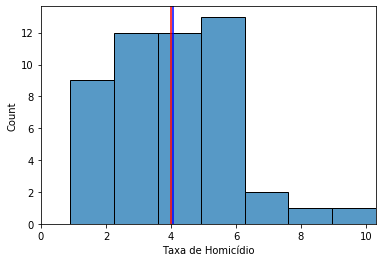

In [9]:
coluna = "Taxa de Homicídio"

ax = sns.histplot(df[coluna])

ax.axvline(np.mean(df[coluna]), 0, 1.6, color='b')
ax.axvline(np.median(df[coluna]), 0, 1.6, color='r')
plt.xlim(0, df[coluna].max())

print("Distribuição e dados da coluna:", coluna)